## California Housing Price Prediction (Regression)

#### Step 1: Load the Data

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

##### Load dataset

In [13]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

print("First 5 rows:")
print(X.head())
print(X.info())

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6 

In [10]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)

print(X.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


#### Step 2: Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 3: Feature Scaling

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Step 4: Train the Model

In [5]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

#### Step 5: Make Predictions

In [6]:
y_pred = model.predict(X_test_scaled)

#### Step 6: Evaluate the Model

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.5558915986952442
R^2 Score: 0.575787706032451


#### Step 7: Feature Importance (Coefficients)

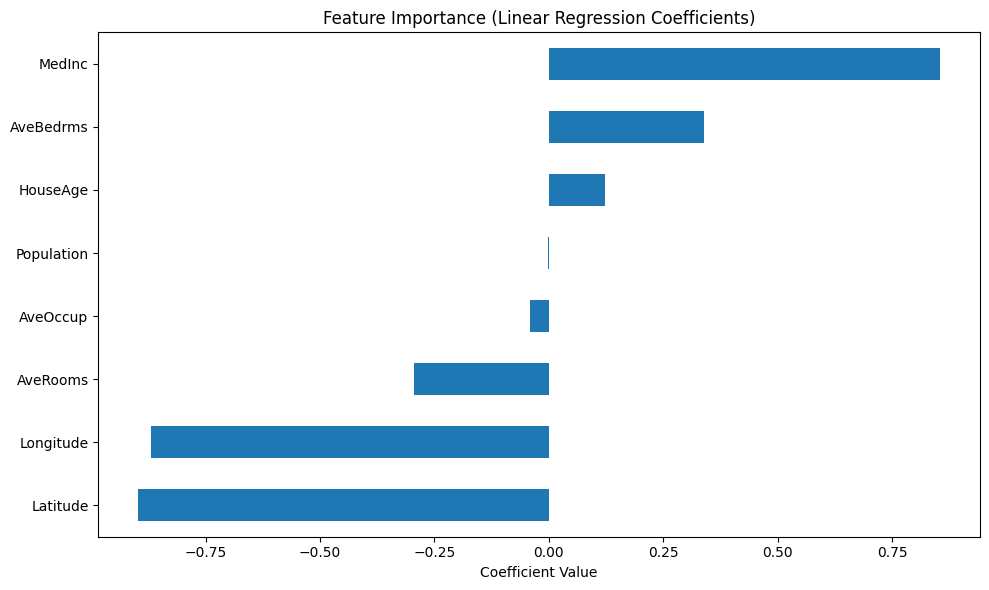

In [9]:
coefficients = pd.Series(model.coef_, index=housing.feature_names)
coefficients = coefficients.sort_values()

plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()